# Partial Differential Equations (PDE)
#### * PHYS220 Introduction to Computational Physics
#### * Zhibo Zhang, Physics Department, UMBC

In [45]:
# Remember: comments in python are denoted by the pound sign
import numpy as np                 #here we load numpy, calling it 'np' from now on
import matplotlib.pyplot as plt    #here we load matplotlib, calling it 'plt'
import time, sys                          #and load some utilities
from IPython.display import Image
%matplotlib inline

## Introduction

Partial Differential Equations (PDEs) describe the evolution of dynamical systems involving both **time and space**. Examples in physics include sound, heat, electromagnetism, fluid flow, elasticity, among others.  PDEs are hard to solve analytically. Therefore, PDEs are often studied via numerical simulations.

Different from ODE, there is no `Scipy` module for solving PDEs. You will have to write your own code.


Example 1: Simple 1-D Linear Advection
-----
***

The 1-D Linear Advection equation is the simplest, most basic model that can be used to learn something about PDE. 

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With given initial conditions (e.g., *wave*), the equation represents the propagation of that initial *wave* with speed $c$, without change of shape. Let the initial condition be $u(x,0)=u_0(x)$. Then the exact solution of the equation is $u(x,t)=u_0(x-ct)$.

Here are a couple features of the exact solution:

1. its shape does not change, being always the same as the initial wave, $u_0$, only shifted in the $x$-direction; and 
2. it's constant along so-called **characteristic curves**, $x-ct=$constant. This means that for any point in space and time, you can move back along the characteristic curve to $t=0$ to know the value of the solution.


<img src="characteristics.png" width=600>

### Discretize Space and Time
In the ODE, we discretized time derivatives; now we have derivatives in both space *and* time, so we need to discretize with respect to *both* these variables. 

Imagine a *space-time* plot, where the coordinates in the vertical direction represent advancing in time—for example, from $t^n$ to $t^{n+1}$—and the coordinates in the horizontal direction move in space: consecutive points are $x_{i-1}$, $x_i$, and $x_{i+1}$.  This creates a grid where a point has both a temporal and spatial index. Here is a graphical representation of the space-time grid:


\begin{matrix}
t^{n+1} & \rightarrow & \bullet  && \bullet  && \bullet  \\
t^n & \rightarrow & \bullet  && \bullet  && \bullet  \\
& &  x_{i-1} && x_i && x_{i+1}
\end{matrix}

For the numerical solution of $u(x,t)$, we'll use subscripts to denote the spatial position, like $u_i$, and superscripts to denote the temporal instant, like $u^n$.  We would then label the solution at the top-middle point in the grid above as follows:
$u^{n+1}_{i}$.
 

Each grid point below has an index $i$, corresponding to the spatial position and increasing to the right, and an index $n$, corresponding to the time instant and increasing upwards.  A small grid segment would have the following values of the numerical solution at each point:


\begin{matrix}
& &\bullet & & \bullet & &  \bullet \\
& &u^{n+1}_{i-1} & & u^{n+1}_i & & u^{n+1}_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &u^n_{i-1} & & u^n_i & & u^n_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &u^{n-1}_{i-1} & & u^{n-1}_i & & u^{n-1}_{i+1} \\
\end{matrix}

Another way to explain our discretization grid is to say that it is built with constant steps in time and space, $\Delta t$ and $\Delta x$, as follows:

\begin{eqnarray}
x_i &=& i\, \Delta x \quad \text{and} \quad t^n= n\, \Delta t \nonumber \\
u_i^n &=& u(i\, \Delta x, n\, \Delta t)
\end{eqnarray}


### Discrete 1-D Linear Advection
Let's see how to discretize the 1-D linear advection equation in both space and time.  By definition, the partial derivative with respect to time changes only with time and not with space; its discretized form changes only the $n$ indices.  Similarly, the partial derivative with respect to $x$ changes with space not time, and only the $i$ indices are affected.  

We'll discretize the spatial coordinate $x$ into points indexed from $i=0$ to $N$, and then step in discrete time intervals of size $\Delta t$.

Now recall what we learned from the numerical dfferentiation. We can discretize the equation as: 

\begin{equation}\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}\end{equation}

note $\Delta t$ has to be sufficiently small. This is  called a _forward difference_ formula. 

<img src="FDapproxiamtions.png" width=400>

As we learned in the numerical differentiation, there are three possible ways to represent a discrete form of $\partial u/ \partial x$, schematically illustrated in the figure above:

* Forward difference: uses $x_i$ and $x_i + \Delta x$,
* Backward difference: uses $x_i$ and $x_i- \Delta x$,
* Central difference: uses two points on either side of $x_i$.

The three formulas for the advection equation are:

\begin{eqnarray}
\frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_i)}{\Delta x} \quad\text{Forward}\\
\frac{\partial u}{\partial x} & \approx & \frac{u(x_i)-u(x_{i-1})}{\Delta x} \quad\text{Backward}\\
\frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_{i-1})}{2\Delta x} \quad\text{Central}
\end{eqnarray}


Euler's method is equivalent to using a forward-difference scheme for the time derivative. Let's use it for time, and choose the backward-difference scheme for the space derivative (a.k.a forward-time-backward-space).  Our discrete equation is then:

\begin{equation}\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0, \end{equation}

where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. With given initial conditions, the only unknown in this discretization is $u_i^{n+1}$.  We solve for this unknown to get an equation that lets us step in time, as follows:

\begin{equation}u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)\end{equation}

Now, let's work on the following example in `Python`

In [46]:
nx = 41 # number of space points
dx = 2.0/(nx-1) 
x = np.arange(0,2+dx,dx)
nt = 20    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c = 1.      #assume wavespeed of c = 1

We also need to set up our initial conditions. The initial velocity $u_0$ is given as 
$u = 2$ in the interval $0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


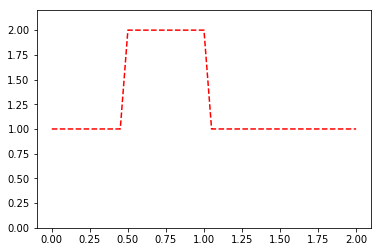

In [50]:
u = np.ones(nx)      #numpy function ones()
u[np.int(0.5/dx) : np.int(1/dx+1)]=2  #setting u = 2 between 0.5 and 1 as per our I.C.s
u0 = u.copy() # store the inital condition for plot
plt.figure()
plt.plot(x, u0,'r--');
plt.ylim([0,2.2])
print(u0)

Why doesn't the hat function have perfectly straight sides? It is because we are now in a discretized world.

Now it's time to implement the discretization of the advection equation using a finite-difference scheme.  

For every element of our array `u`, we need to perform the operation $u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$

We'll store the result in a new (temporary) array `un`, which will be the solution $u$ for the next time-step.  We will repeat this operation for as many time-steps as we specify and then we can see how far the wave has advected.  

We first initialize our placeholder array `un` to hold the values we calculate for the $n+1$ timestep, using once again the NumPy function `ones()`.

Then, we may think we have two iterative operations: one in space and one in time (we'll learn differently later), so we'll start by nesting one loop inside the other. Note the use of the nifty `range()` function. When we write: `for i in range(1,nx)` we will iterate through the `u` array, but we'll be skipping the first element (the zero-th element).  *Why?*

In [51]:
un = np.ones(nx) #initialize a temporary array
for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() 
    u[1:] = un[1:]-c*dt/dx*(un[1:]-un[0:-1])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


(0.0, 2.2)

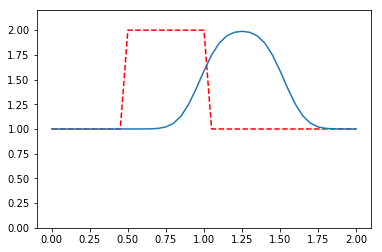

In [52]:
plt.plot(x,u0,'r--')
print(u0)
plt.plot(x,u)
plt.ylim([0.0,2.2])

OK! So our hat function has definitely moved to the right, but it's no longer a hat.  **What's going on?**

The solution differs from the expected square wave because the discretized equation is an approximation of the continuous differential equation that we want to solve. There are errors: we knew that. But the modified shape of the initial wave is something curious. Maybe it can be improved by making the grid spacing finer. Why don't you try it? Does it help?

## Spatial truncation error
Recall the finite-difference approximation we are using for the spatial derivative:

\begin{equation}\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}\end{equation}

We obtain it by using the definition of the derivative at a point, and simply removing the limit, in the assumption that $\Delta x$ is very small. But we already learned with Euler's method that this introduces an error, called the *truncation error*.

Using a Taylor series expansion for the spatial terms now, we see that the backward-difference scheme produces a first-order method, in space.


\begin{equation}
\frac{\partial u}{\partial x}(x_i) = \frac{u(x_i)-u(x_{i-1})}{\Delta x} + \frac{\Delta x}{2} \frac{\partial^2 u}{\partial x^2}(x_i) - \frac{\Delta x^2}{6} \frac{\partial^3 u}{\partial x^3}(x_i)+ \cdots
\end{equation}

The dominant term that is neglected in the finite-difference approximation is of $\mathcal{O}(\Delta x)$. We also see that the approximation *converges* to the exact derivative as $\Delta x \rightarrow 0$. That's good news!

In summary, the chosen "forward-time/backward space" difference scheme is first-order in both space and time: the truncation errors are $\mathcal{O}(\Delta t, \Delta x)$. We'll come back to this!


Example 2: Non-linear Advection
-----
***

Now we're going to implement non-linear advection using the same methods described above.  The 1D advection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *non-linear*  Using the forward difference in time and backward difference in space, we can obtain the following discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function). Try to write the python code below:

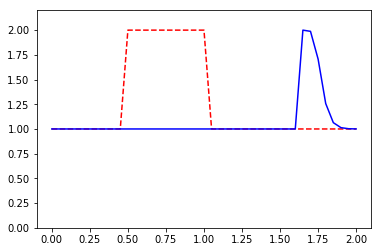

In [53]:
##problem parameters
nx = 41
dx = 2./(nx-1)
x = np.linspace(0,2,nx)
nt = 25    
dt = .025 

##initial conditions
u = np.ones(nx)      
u[np.int(.5/dx) : np.int(1/dx)+1]=2  
u0 = u.copy()
for n in range(1, nt):  
    un = u.copy() 
    u[1:] = un[1:]-un[1:]*dt/dx*(un[1:]-un[0:-1]) 
    #u[0] = 1.0
    

plt.figure()
plt.plot(x, u0, 'r--')
plt.plot(x, un, 'b')
plt.ylim(0,2.2);

Convergence and the Courant–Friedrichs–Lewy (CFL) condition
----
***

For the first few steps, we've been using the same general initial and boundary conditions.  With the parameters we initially suggested, the grid has 41 points and the timestep is 0.25 seconds.  Now, we're going to experiment with increasing the size of our grid.  Trap our code for the 1-D advection in a function

In [54]:
def linearconv1(nx):
    dx = 2.0/(nx-1)
    x = np.arange(0,2.0+dx,dx)
    nt = 20    #nt is the number of timesteps we want to calculate
    dt = .025  #dt is the amount of time each timestep covers (delta t)
    c = 1

    u = np.ones(nx)      #defining a numpy array which is nx elements long with every value equal to 1.
    u[np.int(.5/dx) : np.int(1/dx+1)]=2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    u0=u.copy()
    un = np.ones(nx) #initializing our placeholder array, un, to hold the values we calculate for the n+1 timestep

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        u[1:] = un[1:]-c*dt/dx*(un[1:]-un[0:-1])
    
    plt.figure()
    plt.plot(x,u0,'r--')
    plt.plot(x,u)
    plt.ylim([0,2.2])
    plt.show()

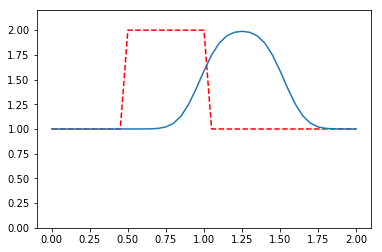

In [55]:
linearconv1(41) #convection using 41 grid points

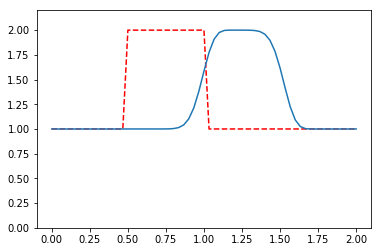

In [56]:
linearconv1(61) #convection using 41 grid points

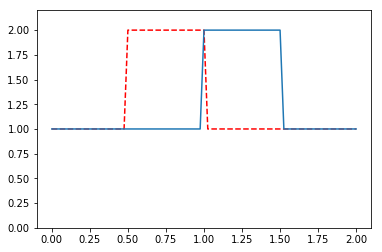

In [57]:
linearconv1(81) #convection using 41 grid points

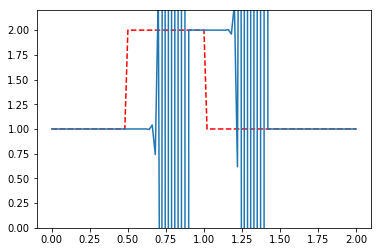

In [58]:
linearconv1(101) #convection using 41 grid points

### What happened?

Something strange happened in the last example.  We have to think a little bit about what we're actually implementing in code.  

In each iteration of our time loop, we use the existing data about our wave to estimate the speed of the wave in the subsequent time step.  Initially, the increase in the number of grid points returned more accurate answers.  There was less numerical diffusion and the square wave looked much more like a square wave than it did in our first example.  

Each iteration of our time loop covers a time-step of length $\Delta t$, which we have been defining as 0.025

During this iteration, we evaluate the speed of the wave at each of the $x$ points we've created.  In the last plot, something has clearly gone wrong.  

What has happened is that over the time period $\Delta t$, the wave is travelling a distance which is greater than `dx`.  The length `dx` of each grid box is related to the number of total points `nx`, so stability can be enforced if the $\Delta t$ step size is calculated with respect to the size of `dx`.  

$$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{max}$$

where $u$ is the speed of the wave; $\sigma$ is called the **Courant number** and the value of $\sigma_{max}$ that will ensure stability depends on the discretization used. 

In a new version of our code, we'll use the CFL number to calculate the appropriate time-step `dt` depending on the size of `dx`.  



<img src="CFLcondition.png" width=600>

Consider the illustration above. When the distance $c\Delta t$, covered by the numerical solution in one time step, is smaller than $\Delta x$, then the information about the solution in the previous step is contained within the green triangle, representing the _domain of dependence_ of the numerical scheme.

If $\Delta x$ is smaller than $c\Delta t$, then the information about the solution needed for $u_i^{n+1}$ is not available in the numerical scheme, because the characteristic line traced from the grid coordinate $i, n+1$ lands _behind_ the point $i-1$ on the grid. But information on the solution there is not available from the numerical scheme! 

The following condition ensures that the domain of dependence of the differential equation should be contained in the _numerical_ domain of dependence: 

\begin{equation}\sigma = \frac{c \Delta t}{\Delta x} \leq 1 
\end{equation}

Stability of the numerical solution can be enforced if the step size `dt` is calculated with respect to the size of `dx` to satisfy the condition above.  

The value of $c\Delta t/\Delta x$ is called the **Courant-Friedrichs-Lewy number** (CFL number), often denoted by $\sigma$. The value $\sigma_{\text{max}}$ that will ensure stability depends on the discretization used; for the forward-time/backward-space scheme, the condition for stability is $\sigma<1$.

In a new version of our code—written _defensively_—, we'll use the CFL number to calculate the appropriate time-step `dt` depending on the size of `dx`.  
 

In [38]:
def linearconv2(nx):
    dx = 2./(nx-1)
    nt = 20    #nt is the number of timesteps we want to calculate
    c = 1
    sigma = .5
    
    dt = sigma*dx

    u = np.ones(nx) 
    u[np.int(.5/dx) : np.int(1/dx+1)]=2

    un = np.ones(nx)

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1,nx):
            u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])
        
    plt.plot(np.linspace(0,2,nx),u)

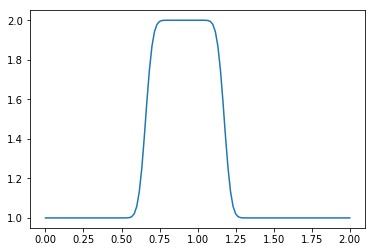

In [39]:
linearconv2(121)

Example 3: 1-D Diffusion Equation 
-----
***

The one-dimensional diffusion equation is:

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

The first thing you should notice is that —unlike the previous two simple equations we have studied— this equation has a second-order derivative. We first need to learn what to do with it!

### Discretizing $\frac{\partial ^2 u}{\partial x^2}$

The second-order derivative can be represented geometrically as the line tangent to the curve given by the first derivative.  We will discretize the second-order derivative with a Central Difference scheme: a combination of Forward Difference and Backward Difference of the first derivative.  Consider the Taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:

$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

If we add these two expansions, you can see that the odd-numbered derivative terms will cancel each other out.  If we neglect any terms of $O(\Delta x^4)$ or higher (and really, those are very small), then we can rearrange the sum of these two expansions to solve for our second-derivative.

$u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\bigg|_i + O(\Delta x^4)$

Then rearrange to solve for $\frac{\partial ^2 u}{\partial x^2}\bigg|_i$ and the result is:

$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$


We can now write the discretized version of the diffusion equation in 1D:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

As before, we notice that once we have an initial condition, the only unknown is $u_{i}^{n+1}$, so we re-arrange the equation solving for our unknown:

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

The above discrete equation allows us to write a program to advance a solution in time. But we need an initial condition. Let's continue using our favorite: the hat function. So, at $t=0$, $u=2$ in the interval $0.5\le x\le 1$ and $u=1$ everywhere else. 

### Stability of the diffusion equation
The diffusion equation is not free of stability constraints. Just like the linear and non-linear advection equations, there are a set of discretization parameters $\Delta x$ and $\Delta t$ that will make the numerical solution blow up. For the diffusion equation, the stability condition for diffusion is

$$
\begin{equation}
\nu \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}
\end{equation}
$$

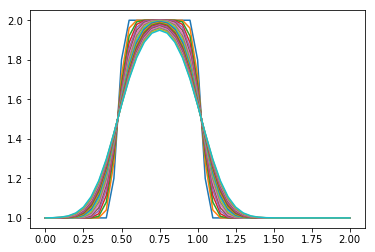

In [40]:
nx = 41
dx = 2./(nx-1)
nt = 20    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma*dx**2/nu #dt is defined using sigma ... more later!


u = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u[np.int(.5/dx) : np.int(1/dx+1)]=2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = np.ones(nx) #our placeholder array, un, to advance the solution in time

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1,nx-1):
        u[i] = un[i] + nu*dt/dx**2*(un[i+1]-2*un[i]+un[i-1])
    plt.plot(np.linspace(0,2,nx), u);